In [3]:
import json
from datetime import datetime

In [4]:
t = '0:01:45'

time = datetime.strptime(t, '%H:%M:%S').time()
time.second

def time_to_seconds(t):
    time = datetime.strptime(t, '%H:%M:%S').time()
    return time.hour*3600 + time.minute*60 + time.second

time_to_seconds(t)

105

In [5]:
episodes_data = json.load(open('../data/raw/episodes.json', 'r'))
characters_data = json.load(open('../data/raw/characters.json', 'r'))

episodes = episodes_data['episodes']
print('Number of episodes:', len(episodes))

characters = set()
characters_by_season = {}

for episode in episodes:
    season = episode['seasonNum']
    scenes = episode['scenes']
    for scene in scenes:
        scene_length = time_to_seconds(scene['sceneEnd']) - time_to_seconds(scene['sceneStart'])
        scene['sceneLength'] = scene_length
        for character in scene['characters']:
            name = character['name']
            characters.add(name)
            if season not in characters_by_season:
                characters_by_season[season] = set()
            characters_by_season[season].add(name)

# Sort characters characters_by_season
characters = sorted(list(characters))
for season in characters_by_season:
    characters_by_season[season] = sorted(list(characters_by_season[season]))

Number of episodes: 73


In [6]:
print("Number of total characters:", len(characters))
print('Number of characters per season:')
for season in characters_by_season:
    print(season, len(characters_by_season[season]))
print('\n\n')

def episodes_from_season(data, season):
    return [episode for episode in data if episode['seasonNum'] == season]

def make_matrix(episodes, characters):
    # Make a 2d matrix of characters x characters
    matrix = []
    for i in range(len(characters)):
        matrix.append([0]*len(characters))
    
    for episode in episodes:
        for scene in episode['scenes']:
            sceneLength = scene['sceneLength']
            characters_in_scene = scene['characters']
            characters_in_scene = [character['name'] for character in characters_in_scene]

            # Fill in the matrix
            for i in range(len(characters_in_scene)):
                for j in range(len(characters_in_scene)):
                    if i != j:
                        matrix[characters.index(characters_in_scene[i])][characters.index(characters_in_scene[j])] += sceneLength

    return matrix

season_1_matrix = make_matrix(episodes_from_season(episodes, 1), characters_by_season[1])
season_2_matrix = make_matrix(episodes_from_season(episodes, 2), characters_by_season[2])
season_3_matrix = make_matrix(episodes_from_season(episodes, 3), characters_by_season[3])
season_4_matrix = make_matrix(episodes_from_season(episodes, 4), characters_by_season[4])
season_5_matrix = make_matrix(episodes_from_season(episodes, 5), characters_by_season[5])
season_6_matrix = make_matrix(episodes_from_season(episodes, 6), characters_by_season[6])
season_7_matrix = make_matrix(episodes_from_season(episodes, 7), characters_by_season[7])
season_8_matrix = make_matrix(episodes_from_season(episodes, 8), characters_by_season[8])

complete_matrix = make_matrix(episodes, characters)

Number of total characters: 577
Number of characters per season:
1 125
2 137
3 137
4 152
5 175
6 208
7 75
8 66





In [7]:
total_time = 0
for episode in episodes:
    for scene in episode['scenes']:
        total_time += scene['sceneLength']
print ('Total time:', total_time)

# Calculate hours, minutes, and seconds
hours, remainder = divmod(total_time, 3600)
minutes, seconds = divmod(remainder, 60)

print(f'{hours} hours, {minutes} minutes, {seconds} seconds')


Total time: 237423
65 hours, 57 minutes, 3 seconds


In [8]:
def top_n_characters(matrix, characters, n=50):
    summed_times = [(idx, sum(row)) for (idx, row) in enumerate(matrix)]
    summed_times = sorted(summed_times, key=lambda x: x[1], reverse=True)
    top_n = summed_times[:n]
    top_n = [(characters[idx], time) for (idx, time) in top_n]
    return top_n

top_50_full = top_n_characters(complete_matrix, characters)
top_50_full

[('Tyrion Lannister', 162382),
 ('Jon Snow', 161827),
 ('Daenerys Targaryen', 134582),
 ('Sansa Stark', 124635),
 ('Cersei Lannister', 107369),
 ('Davos Seaworth', 100864),
 ('Jorah Mormont', 97254),
 ('Lord Varys', 91907),
 ('Arya Stark', 87792),
 ('Jaime Lannister', 87201),
 ('Missandei', 81637),
 ('Bran Stark', 81050),
 ('Brienne of Tarth', 80241),
 ('Sandor Clegane', 72912),
 ('Theon Greyjoy', 69569),
 ('Samwell Tarly', 68403),
 ('Grey Worm', 64867),
 ('Tormund Giantsbane', 58457),
 ('Joffrey Baratheon', 57051),
 ('Petyr Baelish', 48827),
 ('Yohn Royce', 42127),
 ('Catelyn Stark', 41527),
 ('Grand Maester Pycelle', 40894),
 ('Eddard Stark', 40189),
 ('Gendry', 40009),
 ('Gregor Clegane', 37619),
 ('Tywin Lannister', 35936),
 ('Tommen Baratheon', 35370),
 ('Podrick Payne', 34900),
 ('Barristan Selmy', 34490),
 ('Margaery Tyrell', 33797),
 ('Eddison Tollett', 32829),
 ('Qhono', 31292),
 ('Robb Stark', 31173),
 ('Bronn', 30352),
 ('Qyburn', 28818),
 ('Drogon', 28648),
 ('Mace Tyrell',

In [10]:
def normalize_matrix(matrix):
    normalized_matrix = []
    for row in matrix:
        total = sum(row)
        if total == 0:
            normalized_matrix.append(row)
            continue
        normalized_row = [val/total for val in row]
        normalized_matrix.append(normalized_row)
    return normalized_matrix

season_1_mat_norm = normalize_matrix(season_1_matrix)
season_2_mat_norm = normalize_matrix(season_2_matrix)
season_3_mat_norm = normalize_matrix(season_3_matrix)
season_4_mat_norm = normalize_matrix(season_4_matrix)
season_5_mat_norm = normalize_matrix(season_5_matrix)
season_6_mat_norm = normalize_matrix(season_6_matrix)
season_7_mat_norm = normalize_matrix(season_7_matrix)
season_8_mat_norm = normalize_matrix(season_8_matrix)
complete_mat_norm = normalize_matrix(complete_matrix)

In [12]:
eyes = []
for i in range(len(characters)):
    eyes.append(complete_mat_norm[i][i])

print(all([eye == 0.0 for eye in eyes]))

True


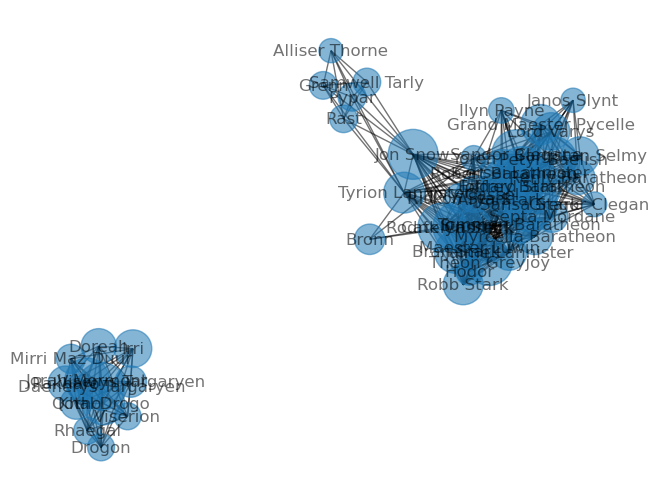

In [49]:
import networkx as nx
import matplotlib as plt

def make_graph(matrix_full, characters):
    matrix_norm = normalize_matrix(matrix_full)
    G = nx.Graph()
    for (idx, row) in enumerate(matrix_full):
        total_time = sum(row)
        G.add_node(characters[idx], total_time=total_time)
    
    for i in range(len(characters)):
        for j in range(len(characters)):
            if i != j:
                time_norm = matrix_norm[i][j]
                if time_norm == 0.0:
                    continue
                G.add_edge(characters[i], characters[j], weight=time_norm)
    return G

def draw_graph(G):
    node_sizes = nx.get_node_attributes(G, 'total_time').values()
    node_sizes = [v*0.05 for v in node_sizes]
    pos = nx.spring_layout(G)
    nx.draw(G,
            with_labels=True,
            pos=pos,
            alpha=0.55,
            node_size=node_sizes,
    )

G_S1 = make_graph(season_1_matrix, characters_by_season[1])

# Limit to top 50 notes
nodes = G_S1.nodes(data=True)
nodes = sorted(nodes, key=lambda x: x[1]['total_time'], reverse=True)[:50]

G_S1 = G_S1.subgraph([node[0] for node in nodes])
draw_graph(G_S1)

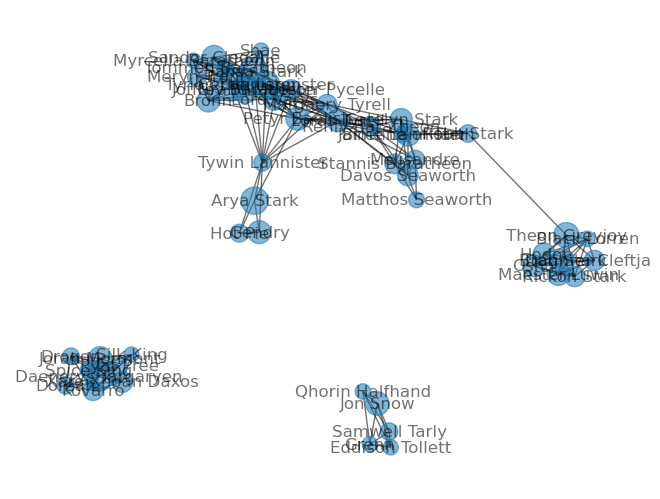

In [50]:
G_S2 = make_graph(season_2_matrix, characters_by_season[2])

# Limit to top 50 notes
nodes = G_S2.nodes(data=True)
nodes = sorted(nodes, key=lambda x: x[1]['total_time'], reverse=True)[:50]

G_S2 = G_S2.subgraph([node[0] for node in nodes])
draw_graph(G_S2)

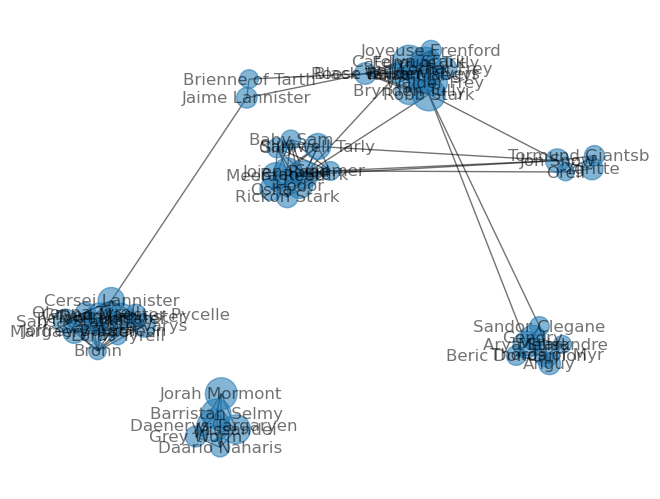

In [52]:
G_S3 = make_graph(season_3_matrix, characters_by_season[3])

# Limit to top 50 notes
nodes = G_S3.nodes(data=True)
nodes = sorted(nodes, key=lambda x: x[1]['total_time'], reverse=True)[:50]

G_S3 = G_S3.subgraph([node[0] for node in nodes])
draw_graph(G_S3)

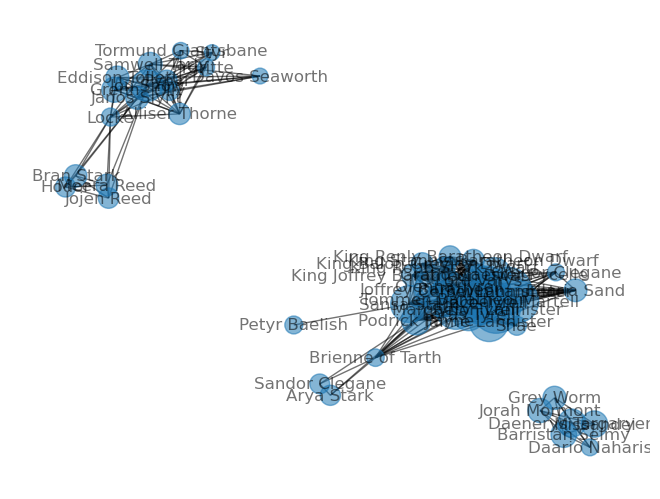

In [53]:
G_S4 = make_graph(season_4_matrix, characters_by_season[4])

# Limit to top 50 notes
nodes = G_S4.nodes(data=True)
nodes = sorted(nodes, key=lambda x: x[1]['total_time'], reverse=True)[:50]

G_S4= G_S4.subgraph([node[0] for node in nodes])
draw_graph(G_S4)

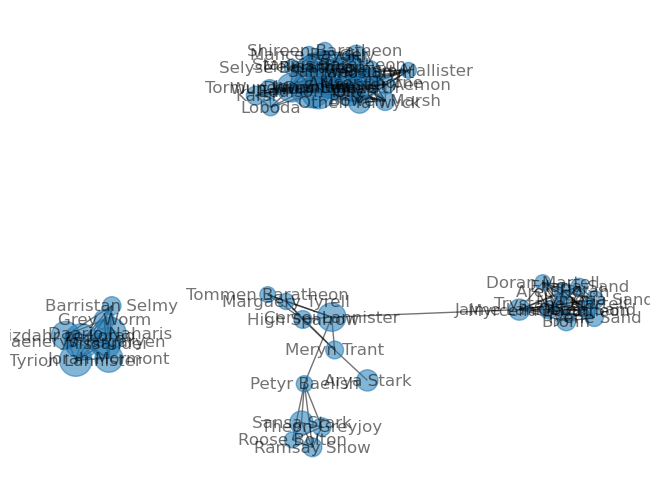

In [54]:
G_S5 = make_graph(season_5_matrix, characters_by_season[5])

# Limit to top 50 notes
nodes = G_S5.nodes(data=True)
nodes = sorted(nodes, key=lambda x: x[1]['total_time'], reverse=True)[:50]

G_S5= G_S5.subgraph([node[0] for node in nodes])
draw_graph(G_S5)

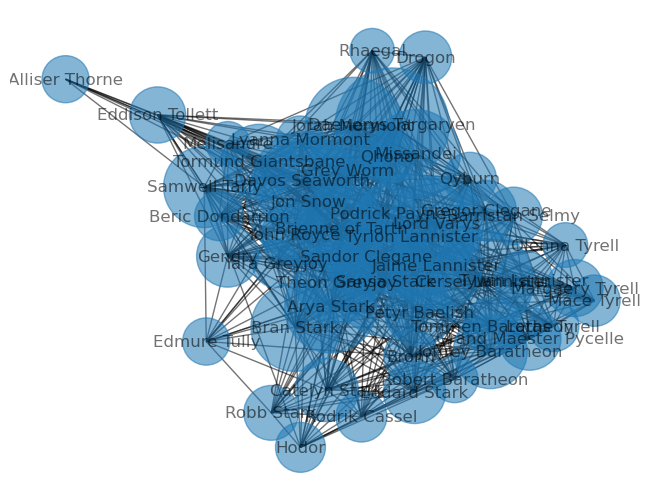

In [55]:
G_complete = make_graph(complete_matrix, characters)

# Limit to top 50 notes
nodes = G_complete.nodes(data=True)
nodes = sorted(nodes, key=lambda x: x[1]['total_time'], reverse=True)[:50]

G_complete= G_complete.subgraph([node[0] for node in nodes])
draw_graph(G_complete)